In [1]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import pandas_datareader.data as web
import datetime  # Import datetime for current time

start = '2010-01-01'
end = datetime.date.today()  # Set 'end' to today's date

df = web.DataReader('AAPL', 'stooq', start, end)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2024-04-10,168.80,169.09,167.11,167.78,49709336.0
2024-04-09,168.70,170.08,168.35,169.67,42451209.0
2024-04-08,169.03,169.20,168.24,168.45,37425513.0
2024-04-05,169.59,170.39,168.95,169.58,42104826.0
2024-04-04,170.29,171.92,168.82,168.82,53704386.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [5]:
#  Date becomes column and are removable.
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-04-10,168.80,169.09,167.11,167.78,49709336.0
1,2024-04-09,168.70,170.08,168.35,169.67,42451209.0
2,2024-04-08,169.03,169.20,168.24,168.45,37425513.0
3,2024-04-05,169.59,170.39,168.95,169.58,42104826.0
4,2024-04-04,170.29,171.92,168.82,168.82,53704386.0


## Information

This code deletes "Date" column from the dataset as they are not useful in our plotting.

In [6]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,168.80,169.09,167.11,167.78,49709336.0
1,168.70,170.08,168.35,169.67,42451209.0
2,169.03,169.20,168.24,168.45,37425513.0
3,169.59,170.39,168.95,169.58,42104826.0
4,170.29,171.92,168.82,168.82,53704386.0


- The project deals with the "close" column.
```py
plt.plot(df.Close)
```
- We can also create for ther columns also.
```py
plt.plot(df.Open)
```
```py
plt.plot(df.High)
```
```py
plt.plot(df.Low)
```
```py
plt.plot(df.Volume)
```

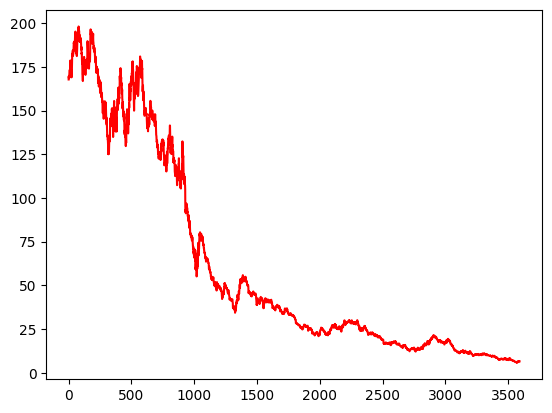

In [7]:
plt.plot(df.Close,color='r')

In [8]:
df

,Open,High,Low,Close,Volume
0,168.80000,169.09000,167.11000,167.78000,4.970934e+07
1,168.70000,170.08000,168.35000,169.67000,4.245121e+07
2,169.03000,169.20000,168.24000,168.45000,3.742551e+07
3,169.59000,170.39000,168.95000,169.58000,4.210483e+07
4,170.29000,171.92000,168.82000,168.82000,5.370439e+07
...,...,...,...,...,...
3586,6.40586,6.45421,6.36458,6.45401,5.246856e+08
3587,6.44444,6.45421,6.36409,6.41085,5.588893e+08
3588,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3589,6.53905,6.56358,6.49230,6.52639,7.055130e+08


In [9]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3586    6.953343
3587    6.937090
3588    6.921914
3589    6.908978
3590    6.897006
Name: Close, Length: 3591, dtype: float64

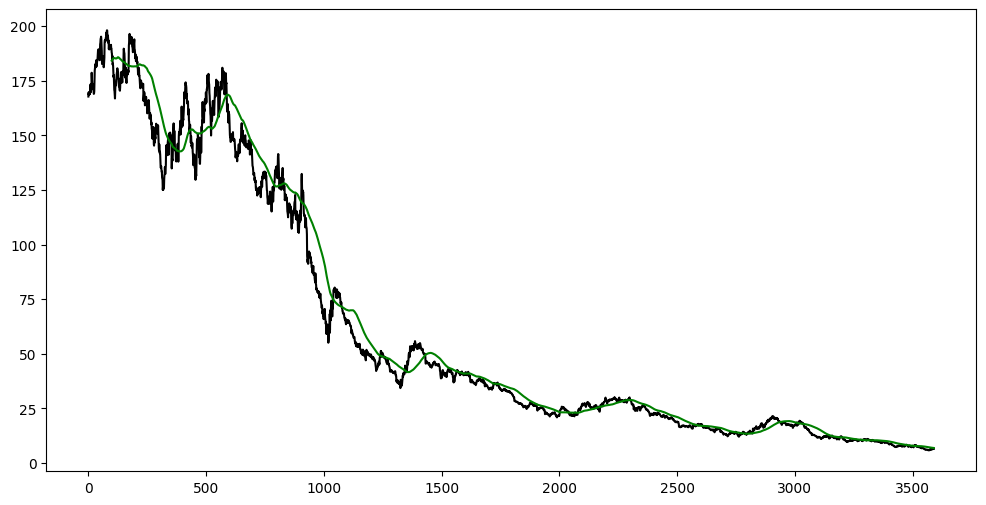

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.plot(df.Close,'black')
plt.plot(ma100,'g') # this is the mean of 100 values

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3586    7.532251
3587    7.517503
3588    7.502498
3589    7.487859
3590    7.473319
Name: Close, Length: 3591, dtype: float64

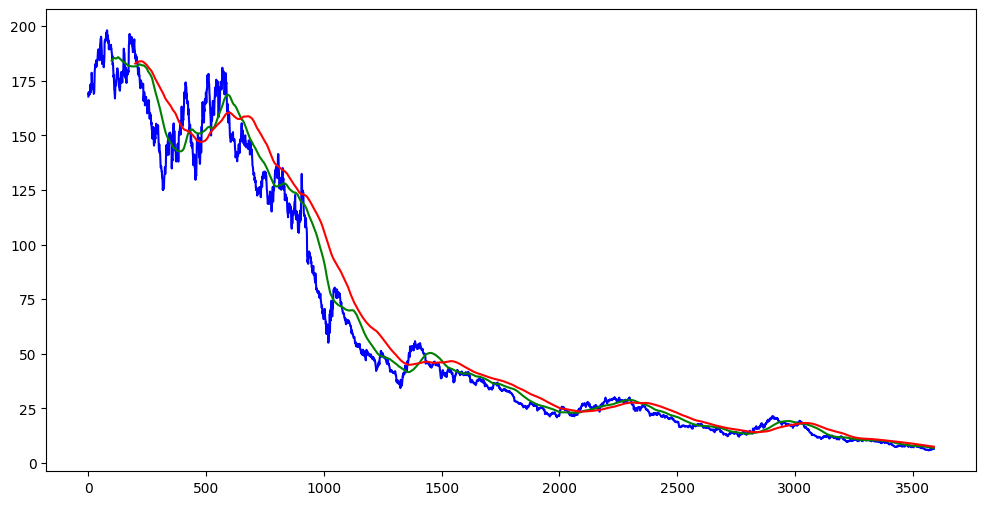

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

ma100=df.Close.rolling(100).mean()
ma100

plt.plot(df.Close,'b')
plt.plot(ma100,'g') # this is the mean of 100 values
plt.plot(ma200,'r') # this is the mean of 200 values

In [13]:
df.shape

(3591, 5)

### This the section

- We are splitting the data into 70% for training data **data_training** and for testing **data_testing** will be remaining 30% from the 70% value till last.

In [14]:
# splitting the data into training and testing
import pandas as pd
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (2513, 1)
Used data for testing:  (1078, 1)


In [15]:
data_training.head()

,Close
0,167.78
1,169.67
2,168.45
3,169.58
4,168.82


In [16]:
data_testing.head()

,Close
2513,16.4060
2514,16.5236
2515,16.4578
2516,16.5824
2517,16.7977


For LSTM , we need to scale the data into the range of [-1,1] and **Scaling is required.**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.83305096],
       [0.84345431],
       [0.83673892],
       ...,
       [0.00212966],
       [0.00104309],
       [0.        ]])

- The above **data_training_array** needs to be divided into following **x_train** and **y_train** variable.


In [18]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train,y_train = np.array(x_train), np.array(y_train)

# ML Model

In [19]:
!pip install tensorflow

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [21]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Orthogonal
import tensorflow as tf


model = tf.keras.Sequential()
model.add(LSTM(units=50,
               activation ='relu',
               return_sequences = True,
               input_shape=(x_train.shape[1],1),
                recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.3))



model.add(LSTM(units=80,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.4))



model.add(LSTM(units=120,
               activation ='relu',
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.5))



# Dense Layer - to connect all the layers
# model.add(Dense(units=1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer=Orthogonal(gain=1.0, seed=None)))

# Set Optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.5 MB/s eta 0:00:00


In [24]:
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow_addons.metrics import RSquare

model.compile(optimizer=opt,
              loss='mean_squared_error',  # Retain MSE for regression
              metrics=['accuracy',  # Include accuracy for reference (optional)
                       MeanSquaredError(),
                       MeanAbsoluteError(),
                       RSquare()])
model.fit(x_train,y_train,epochs=100,batch_size=32)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/100
76/76 [==============================] - 40s 441ms/step - loss: 0.0379 - accuracy: 4.1442e-04 - mean_squared_error: 0.0379 - mean_absolute_error: 0.1216 - r_square: 0.5962
Epoch 2/100
76/76 [==============================] - 19s 255ms/step - loss: 0.0073 - accuracy: 4.1442e-04 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0546 - r_square: 0.9226
Epoch 3/100
76/76 [==============================] - 20s 267ms/step - loss: 0.0068 - accuracy: 4.1442e-04 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0505 - r_square: 0.9275
Epoch 4/100
76/76 [==============================] - 19s 255ms/step - loss: 0.0055 - accuracy: 4.1442e-04 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0457 - r_square: 0.9413
Epoch 5/100
76/76 [==============================] - 20s 267ms/step - loss: 0.0058 - accuracy: 4.1442e-04 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0475 - r_square: 0.9382
Epoch 6/100
76/76 [==============================] - 22s 285ms/step - loss: 0.00

In [41]:
model.save('keras_model_real_time_data(epoch-100).h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
data_testing.head()


,Close
2513,16.4060
2514,16.5236
2515,16.4578
2516,16.5824
2517,16.7977


In [43]:
data_training.head()

,Close
0,167.78
1,169.67
2,168.45
3,169.58
4,168.82


In [44]:
# We need previous 100 days data and we need to comapre and append the list.
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [45]:
final_df.head()

,Close
0,22.0407
1,22.1763
2,21.9859
3,22.1694
4,23.1434


### Scaling of final prepared dataframe.

In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.9362488 ],
       [0.94408834],
       [0.93308061],
       ...,
       [0.03328568],
       [0.03930871],
       [0.03866293]])

In [47]:
input_data.shape

(1178, 1)

In [48]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [49]:
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1078, 100, 1)
(1078,)


In [50]:
# Making Predictions

y_predicted = model.predict(x_test)


34/34 [==============================] - 3s 76ms/step


In [51]:
y_predicted.shape

(1078, 1)

In [52]:
y_test

array([0.61048579, 0.61728469, 0.61348054, ..., 0.03328568, 0.03930871,
       0.03866293])

In [53]:
y_predicted

array([[0.62989104],
       [0.6171423 ],
       [0.6063795 ],
       ...,
       [0.08621389],
       [0.08692227],
       [0.08750257]], dtype=float32)

In [54]:
scaler.scale_

array([0.05781373])

In [55]:
scale_factor=1/0.05781373
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor


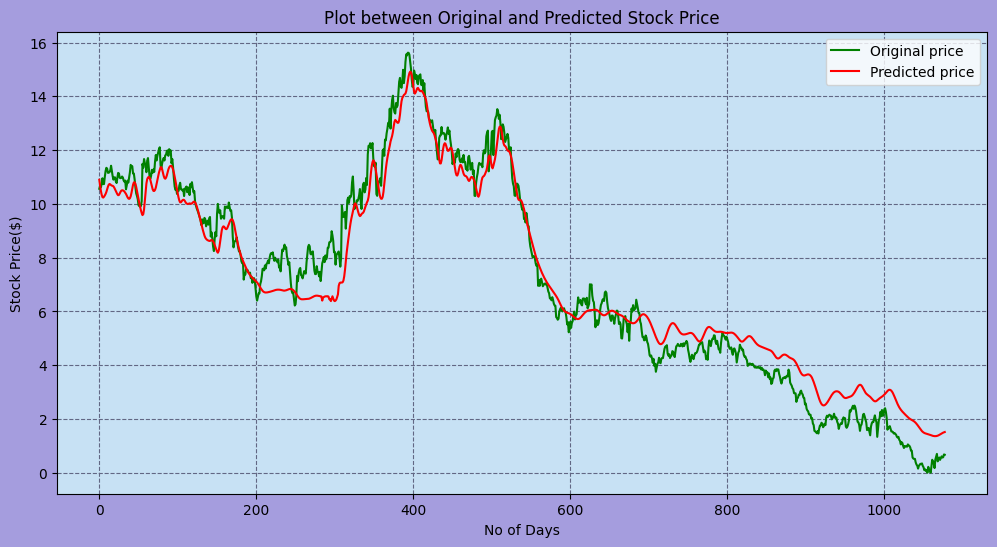

In [56]:
fig=plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#A59DDE')

ax = plt.axes()
ax.set_facecolor('#C7E1F4')

plt.grid(True, linestyle='--', color='#626784')
plt.plot(y_test, 'g', label="Original price")
plt.plot(y_predicted, 'r', label="Predicted price")

plt.title("Plot between Original and Predicted Stock Price")
plt.xlabel('No of Days')
plt.ylabel('Stock Price($)')
plt.legend()
plt.show()